In [15]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Задані точки
x = np.array([0.7,0.8,1.3,1.9,2.3])
y = np.array([2.63,2.87,2.19,1.76,3.43])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)

for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i + 1] - a[i]) - (3 / h[i - 1]) * (a[i] - a[i - 1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i + 1] - x[i - 1]) - h[i - 1] * mu[i - 1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

# Виправлення обчислення коефіцієнтів для останнього відрізка
c[n - 1] = (alpha[n - 1] - h[n - 2] * z[n - 2]) / (2 * (h[n - 2] + mu[n - 1]))
b[n - 1] = (a[n] - a[n - 1]) / h[n - 1] - h[n - 1] * (2 * c[n - 1] + c[n - 2]) / 3
d[n - 1] = (c[n - 1] - c[n - 2]) / (3 * h[n - 1])

for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j + 1]
    b[j] = (a[j + 1] - a[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
    d[j] = (c[j + 1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайна для кожного відрізка
for i in range(n):
    print(f"Відрізок {i + 1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3")


Відрізок 1:
S_0(x) = 2.63 + 2.7272(x - 0.7) + 0.0(x - 0.7)^2 + -32.7218(x - 0.7)^3
Відрізок 2:
S_1(x) = 2.87 + 1.7456(x - 0.8) + -9.8165(x - 0.8)^2 + 7.2108(x - 0.8)^3
Відрізок 3:
S_2(x) = 2.19 + -2.6629(x - 1.3) + 0.9997(x - 1.3)^2 + 3.7399(x - 1.3)^3
Відрізок 4:
S_3(x) = 1.76 + 2.1133(x - 1.9) + 7.7315(x - 1.9)^2 + 6.4429(x - 1.9)^3


Значення сплайна:
x = 0.70, y = 2.630
x = 0.72, y = 2.683
x = 0.73, y = 2.730
x = 0.75, y = 2.772
x = 0.76, y = 2.808
x = 0.78, y = 2.839
x = 0.80, y = 2.866
x = 0.81, y = 2.887
x = 0.83, y = 2.904
x = 0.85, y = 2.916
x = 0.86, y = 2.925
x = 0.88, y = 2.929
x = 0.89, y = 2.929
x = 0.91, y = 2.926
x = 0.93, y = 2.919
x = 0.94, y = 2.908
x = 0.96, y = 2.895
x = 0.97, y = 2.878
x = 0.99, y = 2.859
x = 1.01, y = 2.837
x = 1.02, y = 2.813
x = 1.04, y = 2.786
x = 1.06, y = 2.757
x = 1.07, y = 2.727
x = 1.09, y = 2.694
x = 1.10, y = 2.660
x = 1.12, y = 2.625
x = 1.14, y = 2.588
x = 1.15, y = 2.550
x = 1.17, y = 2.512
x = 1.18, y = 2.473
x = 1.20, y = 2.433
x = 1.22, y = 2.393
x = 1.23, y = 2.353
x = 1.25, y = 2.313
x = 1.27, y = 2.273
x = 1.28, y = 2.234
x = 1.30, y = 2.195
x = 1.31, y = 2.157
x = 1.33, y = 2.119
x = 1.35, y = 2.083
x = 1.36, y = 2.048
x = 1.38, y = 2.013
x = 1.39, y = 1.980
x = 1.41, y = 1.947
x = 1.43, y = 1.916
x = 1.44, y = 1.886
x = 1.46, y = 1.857
x = 1.48, y = 1.830
x 

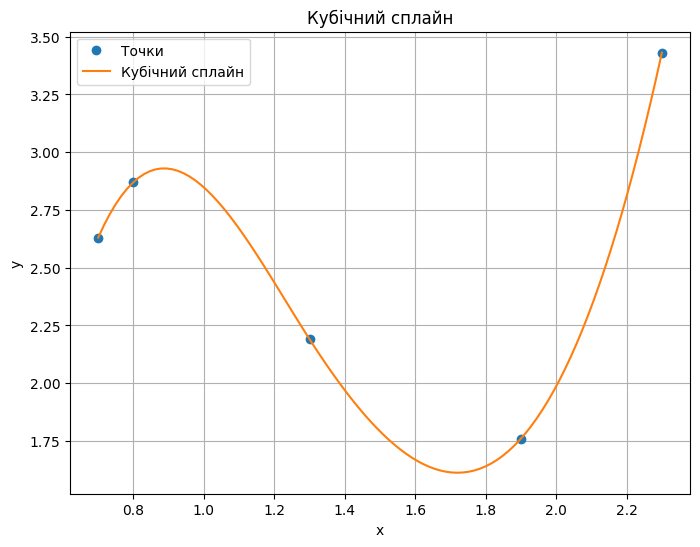

In [16]:
# Побудова кубічного сплайна
cs = CubicSpline(x, y)
# Генерація нових точок для гладкого графіку сплайна
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)
# Роздрукуйте значення сплайна
print("Значення сплайна:")
for i in range(len(x_new)):
 print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")
# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()